# Imports

In [18]:
import os
import random
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import string
import numpy as np
import math

# Loading Validation Annual Report

In [19]:
import os
import random

path = '/home/student/Downloads/fns2020_dataset/validation/annual_reports'
seed = 137

def load_data(file_path, seed):
    """
    Load the content of a text file specified by the given file path.

    Parameters:
    - file_path (str): The path to the text file.
    - seed (int): A seed value for randomization or other purposes.

    Returns:
    - str: The content of the text file.
    """
    with open(file_path, 'r') as f:
        text = f.read()
    return text

# Specify the filename you want to read
filename_to_read = '30888.txt'
file_path = os.path.join(path, filename_to_read)

# Call the load_data function with the specific file path
data = load_data(file_path, seed)
map_to_data = load_data(file_path, seed)

# Now train_text contains the content of the specified text file
print(data)

 Annual Report  
and Accounts  
2017
Spectris plc Annual Report and Accounts 2017
SOLUTIONS 
DRIVEN
CUSTOMER 
FOCUSED Spectris is a leading supplier of 
productivity-enhancing instrumentation 
and controls. Our businesses are 
leaders in the markets they serve, 
with recognised brands and  
award-winning products.
We provide complete solutions 
combining hardware, software and 
related services for some of the most 
technically-demanding industrial 
applications. Our innovative solutions 
are designed to enhance customers’ 
productivity, yielding clear benefits 
by helping them to work better, 
faster and more efficiently. +13%
+9%
+11%
>100%
+14%
>100%
-38pp
Dividend per share
56.5p
(2016: 52.0p)
2017 highlights
1. The adjusted performance measures represent the statutory results  
excluding certain non-operational items. Like-for-like (‘LFL’) measures are  
stated at constant exchange rates and include acquisitions and disposals on a 
comparable basis. These are deemed alternative pe

# Loading Validation Goldan Summary Report

In [20]:
import os
import random

path = '/home/student/Downloads/fns2020_dataset/validation/gold_summaries'
seed = 137

def load_data(file_path, seed):
    """
    Load the content of a text file specified by the given file path.

    Parameters:
    - file_path (str): The path to the text file.
    - seed (int): A seed value for randomization or other purposes.

    Returns:
    - str: The content of the text file.
    """
    with open(file_path, 'r') as f:
        text = f.read()
    return text

# Specify the filename you want to read
filename_to_read = '30888_3.txt'
file_path = os.path.join(path, filename_to_read)


map_to_mapper = load_data(file_path, seed)
print(map_to_mapper)

 ENHANCING 
our business
Results overview
In my first year as Chairman of Spectris, it is pleasing to see  
the Group deliver a 6% increase in constant currency, organic  
(like-for-like, ‘LFL’
1
) sales, driving an 8% LFL increase in adjusted 
operating profit. Reported sales increased 13% in 2017 to  
£1,525.6 million and reported operating profit increased to  
£182.4 million resulting in operating margins of 12.0%  
on a reported basis and 14.7% on an adjusted basis. Cash 
conversion
2
 was 75% of our adjusted operating profit following  
a material step-up in growth capex in our Test and Measurement 
division. Adjusted earnings per share (‘EPS’) increased by 14% to 
145.1p with reported basic EPS at 197.0p. 
The Group continues to make good progress on the delivery of its 
strategy and during the year, we made a number of changes to our 
portfolio, including bolt-on acquisitions and a divestment. Following 
these transactions, the Group’s financial position is robust, with net 
de

In [21]:
# Removing URL's  
def remove_url(review):
    """
    Remove URLs from the input text.

    Parameters:
    - review (str): The input text.

    Returns:
    - str: The text with URLs removed.
    """
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',review)


map_to_data = remove_url(map_to_data)
#map_to_mapper = remove_url(map_to_mapper)
print(map_to_data)

 Annual Report  
and Accounts  
2017
Spectris plc Annual Report and Accounts 2017
SOLUTIONS 
DRIVEN
CUSTOMER 
FOCUSED Spectris is a leading supplier of 
productivity-enhancing instrumentation 
and controls. Our businesses are 
leaders in the markets they serve, 
with recognised brands and  
award-winning products.
We provide complete solutions 
combining hardware, software and 
related services for some of the most 
technically-demanding industrial 
applications. Our innovative solutions 
are designed to enhance customers’ 
productivity, yielding clear benefits 
by helping them to work better, 
faster and more efficiently. +13%
+9%
+11%
>100%
+14%
>100%
-38pp
Dividend per share
56.5p
(2016: 52.0p)
2017 highlights
1. The adjusted performance measures represent the statutory results  
excluding certain non-operational items. Like-for-like (‘LFL’) measures are  
stated at constant exchange rates and include acquisitions and disposals on a 
comparable basis. These are deemed alternative pe

In [22]:
import re

def remove_em_dashes(input_text):
    """
    Remove consecutive em dashes from the input text.

    Parameters:
    - input_text (str): The input text.

    Returns:
    - str: The text with consecutive em dashes removed.
    """
    # Define a regular expression pattern to match consecutive em dashes
    em_dash_pattern = re.compile(r'–+')

    # Use re.sub to replace consecutive em dashes with an empty string
    output_text = em_dash_pattern.sub('', input_text)

    return output_text


map_to_data= remove_em_dashes(map_to_data)

#map_to_mapper = remove_em_dashes(map_to_mapper)
print(map_to_data)


 Annual Report  
and Accounts  
2017
Spectris plc Annual Report and Accounts 2017
SOLUTIONS 
DRIVEN
CUSTOMER 
FOCUSED Spectris is a leading supplier of 
productivity-enhancing instrumentation 
and controls. Our businesses are 
leaders in the markets they serve, 
with recognised brands and  
award-winning products.
We provide complete solutions 
combining hardware, software and 
related services for some of the most 
technically-demanding industrial 
applications. Our innovative solutions 
are designed to enhance customers’ 
productivity, yielding clear benefits 
by helping them to work better, 
faster and more efficiently. +13%
+9%
+11%
>100%
+14%
>100%
-38pp
Dividend per share
56.5p
(2016: 52.0p)
2017 highlights
1. The adjusted performance measures represent the statutory results  
excluding certain non-operational items. Like-for-like (‘LFL’) measures are  
stated at constant exchange rates and include acquisitions and disposals on a 
comparable basis. These are deemed alternative pe

In [23]:
import re

def remove_ellipsis(input_string):
    """
    Remove occurrences of three consecutive dots (ellipsis) from the input text.

    Parameters:
    - input_string (str): The input text.

    Returns:
    - str: The text with occurrences of three consecutive dots removed.
    """
    # Define the regex pattern to match three consecutive dots
    pattern = r'\.{3}'
    
    # Use re.sub to replace occurrences of the pattern with an empty string
    result = re.sub(pattern, '', input_string)
    
    return result


map_to_data = remove_ellipsis(map_to_data)
#map_to_mapper = remove_ellipsis(map_to_mapper)
print(map_to_data)


 Annual Report  
and Accounts  
2017
Spectris plc Annual Report and Accounts 2017
SOLUTIONS 
DRIVEN
CUSTOMER 
FOCUSED Spectris is a leading supplier of 
productivity-enhancing instrumentation 
and controls. Our businesses are 
leaders in the markets they serve, 
with recognised brands and  
award-winning products.
We provide complete solutions 
combining hardware, software and 
related services for some of the most 
technically-demanding industrial 
applications. Our innovative solutions 
are designed to enhance customers’ 
productivity, yielding clear benefits 
by helping them to work better, 
faster and more efficiently. +13%
+9%
+11%
>100%
+14%
>100%
-38pp
Dividend per share
56.5p
(2016: 52.0p)
2017 highlights
1. The adjusted performance measures represent the statutory results  
excluding certain non-operational items. Like-for-like (‘LFL’) measures are  
stated at constant exchange rates and include acquisitions and disposals on a 
comparable basis. These are deemed alternative pe

# Summerization

[nltk_data] Downloading package punkt to /home/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['Annual', 'Report', 'and', 'Accounts', '2017', 'Spectris', 'plc', 'Annual', 'Report', 'and', 'Accounts', '2017', 'SOLUTIONS', 'DRIVEN', 'CUSTOMER', 'FOCUSED', 'Spectris', 'is', 'a', 'leading', 'supplier', 'of', 'productivity-enhancing', 'instrumentation', 'and', 'controls', '.'], ['Our', 'businesses', 'are', 'leaders', 'in', 'the', 'markets', 'they', 'serve', ',', 'with', 'recognised', 'brands', 'and', 'award-winning', 'products', '.'], ['We', 'provide', 'complete', 'solutions', 'combining', 'hardware', ',', 'software', 'and', 'related', 'services', 'for', 'some', 'of', 'the', 'most', 'technically-demanding', 'industrial', 'applications', '.'], ['Our', 'innovative', 'solutions', 'are', 'designed', 'to', 'enhance', 'customers', '’', 'productivity', ',', 'yielding', 'clear', 'benefits', 'by', 'helping', 'them', 'to', 'work', 'better', ',', 'faster', 'and', 'more', 'efficiently', '.'], ['+13', '%', '+9', '%', '+11', '%', '>', '100', '%', '+14', '%', '>', '100', '%', '-38pp', 'Dividend',

[2.2562523663751213, 2.7798261070567603, 3.2343940036994363, 4.354619074996662, 1.8285609409284502, 2.836680112276762, 3.032981332902387, 1.9790848941537305, 3.4481908257891365, 8.845710206325217, 5.627634443518813, 3.5024017444908226, 1.9976305410802595, 4.9999683274769104, 3.749643895485893, 6.321217407790483, 3.5315896835029665, 4.718733854444892, 1.2229492498552037, 2.584118939545301, 3.0236490699129126, 3.4885756439011786, 3.8823951731564, 6.884211996538346, 4.877276592221712, 5.486528738237849, 4.299793342622404, 6.789037841927888, 4.501852139184212, 4.561620316910189, 2.8579553817006205, 4.490635506527949, 4.712503473476958, 4.159019849220613, 5.1498707246055275, 5.290089017953238, 1.4534587912375798, 1.9115686501355051, 2.3601770160713142, 3.295947208951738, 4.973197756934141, 3.8219806940467866, 6.539409112876049, 2.375923045759403, 5.220667098982314, 4.946900773355439, 2.4439941974513415, 3.0271274800755914, 0.8177266971959839, 4.053554412415456, 3.4308126362277522, 3.4871755

/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

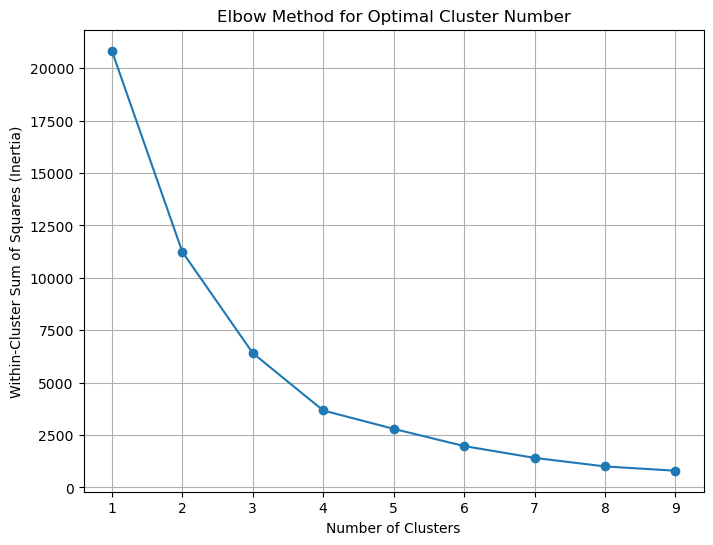

/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [24]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')

def tokenize_sentences(text):
    """
    Tokenize the input text into sentences and further tokenize each sentence into words.

    Parameters:
    - text (str): The input text.

    Returns:
    - list of lists: Tokenized sentences.
    """
    sentences = sent_tokenize(text)
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    return tokenized_sentences
x1 = tokenize_sentences(map_to_data)
print(x1)
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_tfidf_scores(tokenized_sentences):
    """
    Calculate TF-IDF scores for the given tokenized sentences.

    Parameters:
    - tokenized_sentences (list of lists): Tokenized sentences.

    Returns:
    - tuple: Feature names and TF-IDF scores.
    """
    # Convert tokenized sentences to a list of strings
    sentences_as_strings = [' '.join(sentence) for sentence in tokenized_sentences]

    # Initialize the TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the sentences to calculate TF-IDF scores
    tfidf_matrix = vectorizer.fit_transform(sentences_as_strings)

    # Get the feature names (words) and corresponding TF-IDF scores
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()

    return feature_names, tfidf_scores
x2 = calculate_tfidf_scores(x1)


def assign_scores_to_sentences(tokenized_sentences, feature_names, tfidf_scores):
    """
    Assign TF-IDF scores to each sentence based on the given feature names and TF-IDF scores.

    Parameters:
    - tokenized_sentences (list of lists): Tokenized sentences.
    - feature_names (list): Feature names.
    - tfidf_scores (array): TF-IDF scores.

    Returns:
    - list: Sentence scores.
    """
    sentence_scores = []

    for i, sentence in enumerate(tokenized_sentences):
        total_score = sum(tfidf_scores[i, np.where(feature_names == word)[0][0] if np.any(feature_names == word) else -1] for word in sentence)
        sentence_scores.append(total_score)

    return sentence_scores

x3 = assign_scores_to_sentences(x1, x2[0], x2[1])
print(x3)

def print_sentences_with_scores(sentences, scores):
    """
    Print sentences along with their corresponding scores.

    Parameters:
    - sentences (list of lists): Tokenized sentences.
    - scores (list): Sentence scores.
    """
    for sentence, score in zip(sentences, scores):
        print(f"Sentence: {' '.join(sentence)} | Score: {score}")

# Assuming x1 contains tokenized sentences and x3 contains corresponding scores
semi_join = print_sentences_with_scores(x1, x3)


average_tfidf_score = np.mean(x3)
median_val = np.median(x3)
print(median_val)

 
def calculate_average_tfidf_and_formula_results(tfidf_scores_only):
    """
    Calculate average TF-IDF score and apply a formula to each sentence's TF-IDF score.

    Parameters:
    - tfidf_scores_only (list): List of TF-IDF scores.

    Returns:
    - list: Formula results.
    """
    #median_val = np.mean(friday)
    
    print(median_val)
    formula_results = []

    # Calculate the given formula for each sentence
    for i in tfidf_scores_only:
        
        a = i + median_val
        
        b=i + 1
        
        c = i % median_val
        
        d = a/b
        
        e = d + c
        
        
        formula_results.append(e)
    

    # Print only the formula results
    for result in formula_results:
        print(f"Result: {result:.4f}")

    

    return formula_results

cole = calculate_average_tfidf_and_formula_results(x3)
def update_tfidf_scores_and_sentences(tfidf_scores_only, formula_results):
    """
    Update TF-IDF scores based on the given formula results.

    Parameters:
    - tfidf_scores_only (list): List of TF-IDF scores.
    - formula_results (list): Formula results.

    Returns:
    - list: Updated TF-IDF scores.
    """
    if len(tfidf_scores_only) == len(formula_results):
        # Add corresponding values and update tfidf_scores_only
        tfidf_scores_only = [tfidf + formula for tfidf, formula in zip(tfidf_scores_only, formula_results)]
        

    return tfidf_scores_only



jerry = update_tfidf_scores_and_sentences(x3, cole)
#print(jerry)
see_me = np.mean(jerry)
print(see_me)
def get_sentences_with_updated_scores(sentences, scores):
    """
    Get sentences along with their updated scores.

    Parameters:
    - sentences (list of lists): Tokenized sentences.
    - scores (list): Updated scores.

    Returns:
    - list of tuples: Sentences with updated scores.
    """
    result = []
    for sentence, score in zip(sentences, scores):
        result.append((f"Sentence: {' '.join(sentence)}", f"Score: {score}"))
    return result

# Assuming x1 contains tokenized sentences and jerry contains corresponding scores
stored_data = get_sentences_with_updated_scores(x1, jerry)

# # Print or use stored_data as needed
# for data_tuple in stored_data:
#     print(data_tuple)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def plot_elbow_curve(tfidf_scores_array, cluster_range):
    """
    Plot the elbow curve for determining the optimal number of clusters.

    Parameters:
    - tfidf_scores_array (array): TF-IDF scores array.
    - cluster_range (range): Range of potential cluster numbers.
    """
    # Initialize an empty list to store the inertia values (within-cluster sum of squares)
    inertia_values = []

    # Perform KMeans clustering for different cluster numbers and store the inertia values
    for num_clusters in cluster_range:
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(tfidf_scores_array)
        inertia_values.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertia_values, marker='o')
    plt.title('Elbow Method for Optimal Cluster Number')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
    plt.grid(True)
    plt.show()


tfidf_scores_array = np.array(jerry).reshape(-1, 1)
cluster_range = range(1, 10)

plot_elbow_curve(tfidf_scores_array, cluster_range)


def perform_kmeans(tfidf_scores_array, num_clusters):
    """
    Perform KMeans clustering and visualize the results.

    Parameters:
    - tfidf_scores_array (array): TF-IDF scores array.
    - num_clusters (int): Number of clusters.

    Returns:
    - array: Cluster labels.
    """
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_scores_array)
    labels = kmeans.labels_

    # Plot the data points with their assigned clusters
    plt.figure(figsize=(50, 25))
    plt.scatter(range(len(tfidf_scores_array)), tfidf_scores_array, c=labels, cmap='magma', marker='o',s = 250)
    plt.title('KMeans Clustering of Sentences based on TF-IDF Scores with Centroids')
    plt.xlabel('TF-IDF Scores')
    plt.ylabel('Cluster')
    plt.legend()
    plt.show()

    return labels


tfidf_scores_array = np.array(jerry).reshape(-1, 1)
cluster_range = range(1, 10)



# Choose the optimal number of clusters based on the elbow curve analysis
optimal_num_clusters = 4  # Replace this with the chosen number of clusters

# Perform KMeans clustering with the optimal number of clusters and plot the results
now_you_see_me =perform_kmeans(tfidf_scores_array, optimal_num_clusters)


In [25]:
def get_high_score_sentences_from_clusters(labels, tokenized_sentences, scores, threshold_score, num_sentences=10):
    """
    Get high-scoring sentences from each cluster.

    Parameters:
    - labels (array): Cluster labels.
    - tokenized_sentences (list of lists): Tokenized sentences.
    - scores (list): Sentence scores.
    - threshold_score (float): Threshold score for filtering.
    - num_sentences (int): Maximum number of sentences to retrieve per cluster.

    Returns:
    - list of lists: High-scoring sentences from each cluster.
    """
    high_score_sentences = []

    # Iterate through each cluster
    for cluster_label in range(max(labels) + 1):
        cluster_indices = [i for i, label in enumerate(labels) if label == cluster_label]

        # Filter sentences in the cluster with scores greater than or equal to the threshold
        high_score_indices = [i for i in cluster_indices if scores[i] >= median_val]

        # Sort the high-score indices based on the scores
        high_score_indices.sort(key=lambda i: scores[i], reverse=True)

        # Extract sentences from the cluster based on the sorted indices
        cluster_sentences = [tokenized_sentences[i] for i in high_score_indices]

        # Add sentences to the result list, up to the specified number
        high_score_sentences.extend(cluster_sentences[:min(num_sentences, len(cluster_sentences))])

    return high_score_sentences

# Assuming now_you_see_me contains cluster labels, x1 contains tokenized sentences, and x3 contains scores
high_score_sentences = get_high_score_sentences_from_clusters(now_you_see_me, x1, cole, average_tfidf_score)

# Print or use high_score_sentences as needed
for sentence in high_score_sentences:
    print(f"Sentence: {' '.join(sentence)}")


Sentence: Performance Cash conversion was 75 % , a decrease of 38pp over the prior year .
Sentence: Broad geographical and end-market exposure limits risk from major changes to the business environment .
Sentence: LFL sales increased across all four segments and key regions .
Sentence: Acquisition of Omnicon expands services and software offering in key end markets in the USA .
Sentence: 27 Spectris plc Reported sales bridge Financial Review Robust financial PERFORMANCE We delivered like-for-like increases in both sales and operating profit .
Sentence: Other information The Directors are responsible for the other information .
Sentence: This extends the Group ’ s capabilities in the automotive testing services market .
Sentence: These Financial Statements are presented in millions of Sterling rounded to the nearest one decimal place .
Sentence: Warranty commitments typically apply for a 12-month period , but can extend to 36 months .
Sentence: Ownership held in class of ordinary shares

In [26]:
# def get_all_sentences_from_clusters(labels, tokenized_sentences, scores, num_sentences=20):
#     all_sentences = []

#     # Iterate through each cluster
#     for cluster_label in range(max(labels) + 1):
#         cluster_indices = [i for i, label in enumerate(labels) if label == cluster_label]

#         # Sort the indices based on the scores
#         cluster_indices.sort(key=lambda i: scores[i])

#         # Extract sentences from the cluster based on the sorted indices
#         cluster_sentences = [tokenized_sentences[i] for i in cluster_indices]

#         # Add sentences to the result list, up to the specified number
#         all_sentences.extend(cluster_sentences[:min(num_sentences, len(cluster_sentences))])

#     return all_sentences

# # Assuming now_you_see_me contains cluster labels, x1 contains tokenized sentences, and x3 contains scores
# all_sentences = get_all_sentences_from_clusters(now_you_see_me, x1, x3)

# # Print or use all_sentences as needed
# for sentence in all_sentences:
#     print(f"Sentence: {' '.join(sentence)}")


In [27]:
def combine_high_score_sentences(high_score_sentences):
    """
    Combine high-scoring sentences into a single text.

    Parameters:
    - high_score_sentences (list of lists): High-scoring sentences.

    Returns:
    - str: Combined text.
    """
    combined_text = ' '.join([' '.join(sentence) for sentence in high_score_sentences])
    return combined_text

# Assuming high_score_sentences contains the high-scoring sentences
combined_text = combine_high_score_sentences(high_score_sentences)

# Print or use combined_text as needed
print(combined_text)


Performance Cash conversion was 75 % , a decrease of 38pp over the prior year . Broad geographical and end-market exposure limits risk from major changes to the business environment . LFL sales increased across all four segments and key regions . Acquisition of Omnicon expands services and software offering in key end markets in the USA . 27 Spectris plc Reported sales bridge Financial Review Robust financial PERFORMANCE We delivered like-for-like increases in both sales and operating profit . Other information The Directors are responsible for the other information . This extends the Group ’ s capabilities in the automotive testing services market . These Financial Statements are presented in millions of Sterling rounded to the nearest one decimal place . Warranty commitments typically apply for a 12-month period , but can extend to 36 months . Ownership held in class of ordinary shares unless noted with 2 or 3 . Alternative performance measures Policy Spectris uses adjusted figures a

In [28]:
def combine_high_score_sentences_with_limit(high_score_sentences, word_limit=1250):
    """
    Combine high-scoring sentences into a single text with a word limit.

    Parameters:
    - high_score_sentences (list of lists): High-scoring sentences.
    - word_limit (int): Maximum word count allowed.

    Returns:
    - str: Combined text within the specified word limit.
    """
    combined_text = ''
    word_count = 0

    for sentence in high_score_sentences:
        sentence_text = ' '.join(sentence)
        if word_count + len(sentence_text.split()) <= word_limit:
            combined_text += sentence_text + ' '
            word_count += len(sentence_text.split())
        else:
            break

    return combined_text

# Assuming high_score_sentences contains the high-scoring sentences
combined_text_limit = combine_high_score_sentences_with_limit(high_score_sentences, word_limit=1250)

# Print or use combined_text_limit as needed
print(combined_text_limit)


Performance Cash conversion was 75 % , a decrease of 38pp over the prior year . Broad geographical and end-market exposure limits risk from major changes to the business environment . LFL sales increased across all four segments and key regions . Acquisition of Omnicon expands services and software offering in key end markets in the USA . 27 Spectris plc Reported sales bridge Financial Review Robust financial PERFORMANCE We delivered like-for-like increases in both sales and operating profit . Other information The Directors are responsible for the other information . This extends the Group ’ s capabilities in the automotive testing services market . These Financial Statements are presented in millions of Sterling rounded to the nearest one decimal place . Warranty commitments typically apply for a 12-month period , but can extend to 36 months . Ownership held in class of ordinary shares unless noted with 2 or 3 . Alternative performance measures Policy Spectris uses adjusted figures a

# Performance Metrics

In [30]:
import pandas as pd

def calculate_average(csvpath):
    # Read the csv file into a dataframe
    df = pd.read_csv(csvpath)
    df = df.dropna(how='all')
    selected_columns = df[["ROUGE-Type", "Avg_Recall", "Avg_Precision", "Avg_F-Score"]]
    grouped = selected_columns.groupby("ROUGE-Type")[["Avg_Recall", "Avg_Precision", "Avg_F-Score"]].mean()
    return grouped

x = calculate_average("/home/student/Downloads/Approach_2.csv")
print(x)

            Avg_Recall  Avg_Precision  Avg_F-Score
ROUGE-Type                                        
ROUGE-1       0.457073       0.340258     0.378544
ROUGE-2       0.165760       0.102938     0.121899
ROUGE-L       0.348326       0.241703     0.279405
ROUGE-SU4     0.263669       0.138488     0.175324


# Make a Directory

In [ ]:
!mkdir "/home/student/app_final"

# Loading a file

In [31]:
gsPath = "/home/student/Downloads/fns2020_dataset/validation/gold_summaries"
def loadFile(filepath):
    filename = os.path.basename(filepath)[:-4]
    
    fileCont = open(filepath,"r").read().strip()
    
    summFile = filename+"_1.txt"
    
    gs = open(os.path.join(gsPath,summFile),"r").read().strip()
    
    return fileCont,gs

file,summary = loadFile("/home/student/Downloads/fns2020_dataset/validation/annual_reports/30808.txt")

# Summarizer


32217.txt
3.9220443034424846
Result: 4.5945
Result: 5.1647
Result: 2.7863
Result: 3.5838
Result: 1.7493
Result: 4.6420
Result: 2.8084
Result: 1.9479
Result: 2.1798
Result: 4.9337
Result: 1.7195
Result: 5.4753
Result: 2.7845
Result: 2.1026
Result: 4.9489
Result: 4.5509
Result: 5.2275
Result: 5.4516
Result: 1.7558
Result: 5.0685
Result: 4.5479
Result: 4.8131
Result: 4.1531
Result: 4.9791
Result: 1.8068
Result: 4.8140
Result: 4.4268
Result: 1.9287
Result: 4.9280
Result: 5.2229
Result: 4.8509
Result: 5.3634
Result: 4.5984
Result: 2.5787
Result: 4.5913
Result: 4.2302
Result: 2.6866
Result: 4.9483
Result: 5.4265
Result: 2.7436
Result: 2.1202
Result: 5.1571
Result: 3.0533
Result: 3.0927
Result: 1.6612
Result: 4.1241
Result: 2.1682
Result: 3.6884
Result: 2.0752
Result: 2.0213
Result: 5.4534
Result: 4.7219
Result: 4.5113
Result: 2.4870
Result: 5.1290
Result: 2.0105
Result: 2.0985
Result: 5.2908
Result: 2.6056
Result: 4.8977
Result: 3.0637
Result: 4.3653
Result: 5.1974
Result: 4.5479
Result: 2.4

/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

/home/student/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


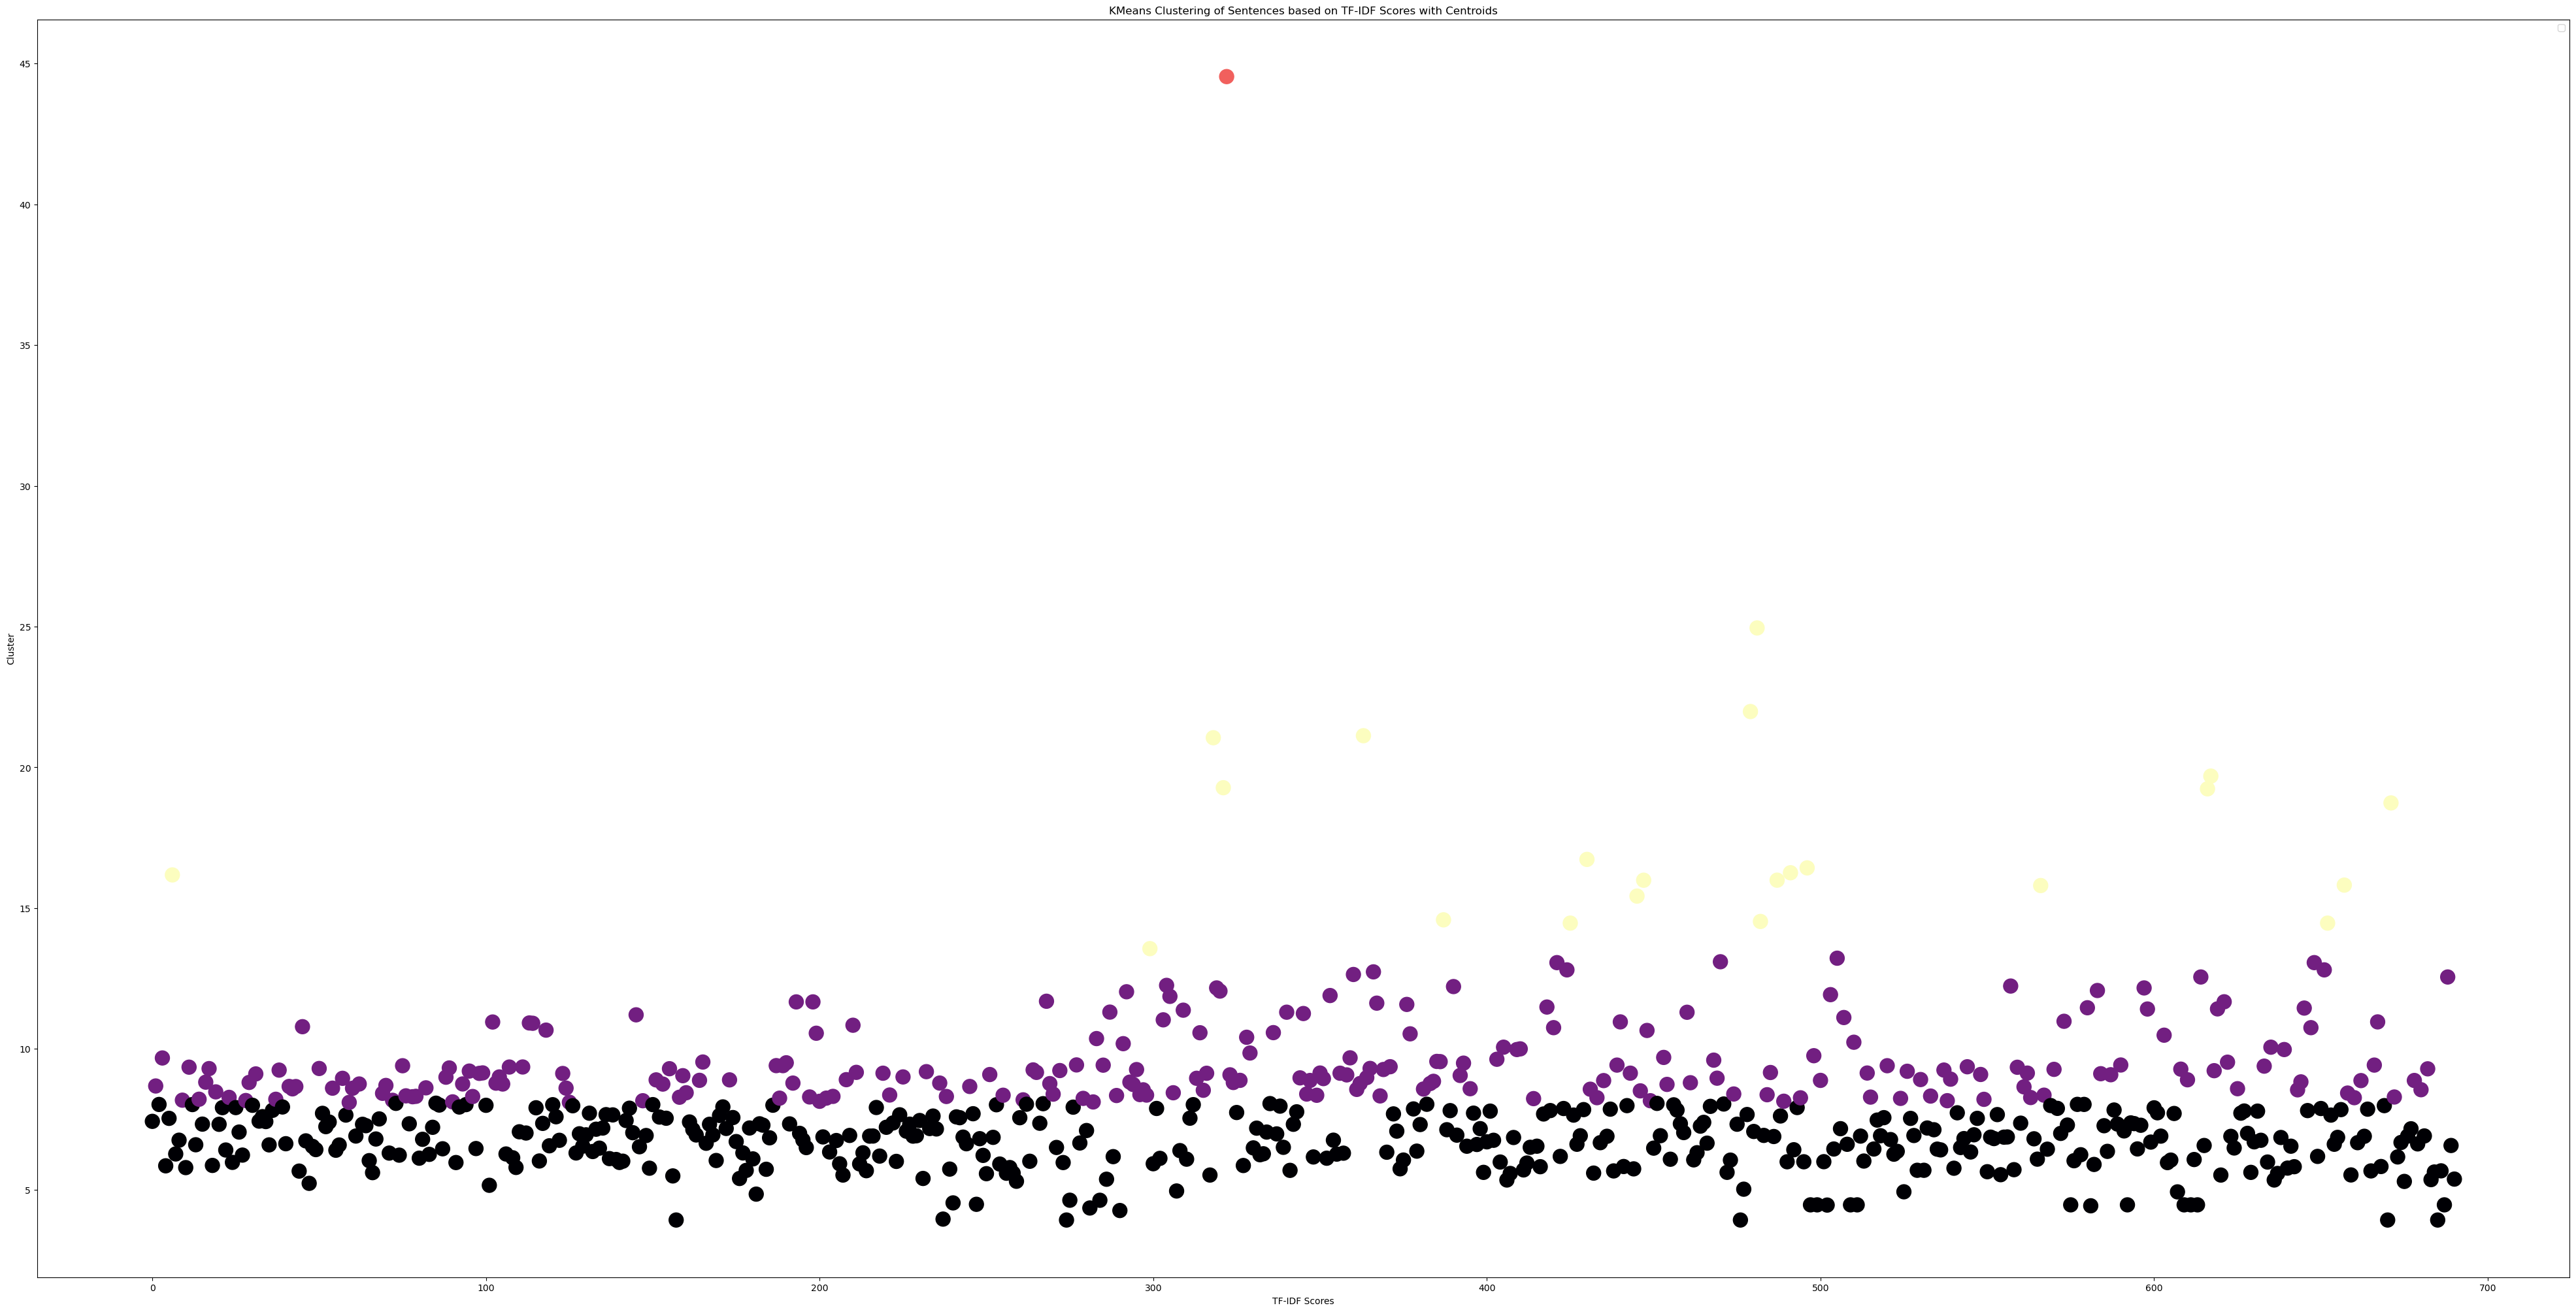

In [33]:
def summarize():
    data_dir = "./fns2020_dataset/validation/annual_reports/"
    gsPath = "./fns2020_dataset/validation/gold_summaries"
    for file in os.listdir(data_dir):
        print(file)
        fileCon,summ = loadFile(os.path.join(data_dir,file))
        
        
        map_to_data = remove_url(fileCon)
        
        
        map_to_data = remove_ellipsis(map_to_data)
        map_to_data = remove_em_dashes(map_to_data)
        x1 = tokenize_sentences(map_to_data)
        x2 = calculate_tfidf_scores(x1)
        x3 = assign_scores_to_sentences(x1, x2[0], x2[1])
        median_val = np.median(x3)
        cole = calculate_average_tfidf_and_formula_results(x3)
        jerry = update_tfidf_scores_and_sentences(x3, cole)
        stored_data = get_sentences_with_updated_scores(x1, jerry)
        tfidf_scores_array = np.array(jerry).reshape(-1, 1)
        cluster_range = range(1, 10)
        plot_elbow_curve(tfidf_scores_array, cluster_range)
        tfidf_scores_array = np.array(jerry).reshape(-1, 1)
        cluster_range = range(1, 10)
        optimal_num_clusters = 4  
        now_you_see_me =perform_kmeans(tfidf_scores_array, optimal_num_clusters)
        high_score_sentences = get_high_score_sentences_from_clusters(now_you_see_me, x1, cole, average_tfidf_score)
        combined_text = combine_high_score_sentences(high_score_sentences)
        combined_text_limit = combine_high_score_sentences_with_limit(high_score_sentences, word_limit=1250)
        
        
        
        
        
        
        
        filename = file[:-4]
        
        with open(f"/home/student/app_final/{filename}_sysSumm.txt","w+") as f:
            f.write(combined_text_limit)
        break
        


summarize()